# **Get and Clean Data**

In [4]:
import pandas as pd

#Get fruiting data from a spreadsheet
!gdown https://docs.google.com/spreadsheets/d/1bX_DC4LxPJfO1sMysi1PY7c42TF4IAGB30gTbLMaNlc/export?format=xlsx -O "acorn_data.xlsx"

/usr/local/lib/python3.12/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://docs.google.com/spreadsheets/d/1bX_DC4LxPJfO1sMysi1PY7c42TF4IAGB30gTbLMaNlc/export?format=xlsx
To: /content/acorn_data.xlsx
16.1kB [00:00, 43.2MB/s]


In [5]:
#transform the fruiting data for better merge 2 dataset

acorn = pd.read_excel("acorn_data.xlsx", sheet_name='acorn_new', engine='openpyxl')

qingsen=pd.DataFrame({'year':acorn.iloc[:,0],
          'location':'青森',
          'flower':acorn.iloc[:,1],
          'fruit':acorn.iloc[:,2]})


yanshou=pd.DataFrame({'year':acorn.iloc[:,0],
          'location':'岩手',
          'flower':acorn.iloc[:,3],
          'fruit':acorn.iloc[:,4]})

gongcheng=pd.DataFrame({'year':acorn.iloc[:,0],
          'location':'宮城',
          'flower':acorn.iloc[:,5],
          'fruit':acorn.iloc[:,6]})

qiutian=pd.DataFrame({'year':acorn.iloc[:,0],
          'location':'秋田',
          'flower':acorn.iloc[:,7],
          'fruit':acorn.iloc[:,8]})

shanxing=pd.DataFrame({'year':acorn.iloc[:,0],
          'location':'山形',
          'flower':acorn.iloc[:,9],
          'fruit':acorn.iloc[:,10]})


df_concat=pd.concat([qingsen,yanshou,qiutian,shanxing,gongcheng],ignore_index=True)
df_concat = df_concat.iloc[1:].reset_index(drop=True)
display(df_concat)

year location flower fruit
0    1989       青森    NaN   3.4
1    1990       青森    3.4   2.2
2    1991       青森    0.8   0.6
3    1992       青森    4.5   4.1
4    1993       青森    2.1     1
..    ...      ...    ...   ...
184  2021       宮城      4   1.7
185  2022       宮城      4   1.3
186  2023       宮城    0.8     0
187  2024       宮城    3.7   4.2
188  2025       宮城    0.3   0.2

[189 rows x 4 columns]

In [6]:
#download the bear data (including injury, death and show-up case)

!gdown https://docs.google.com/spreadsheets/d/1F1QeKcl1RdnqM6PMhDCusNHGSAcPiOkf/export?format=xlsx -O "bear_data.xlsx"

/usr/local/lib/python3.12/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://docs.google.com/spreadsheets/d/1F1QeKcl1RdnqM6PMhDCusNHGSAcPiOkf/export?format=xlsx
To: /content/bear_data.xlsx
26.9kB [00:00, 62.7MB/s]


In [7]:
bear=pd.read_excel("bear_data.xlsx", engine='openpyxl')
display(bear)

location era_x  cases  injury_person  death_person  year era_y  \
0        北海道   H20      3              3             3  2008   NaN   
1         青森   H20      2              6             0  2008   NaN   
2         岩手   H20      9             10             0  2008   NaN   
3         宮城   H20      1              1             0  2008   NaN   
4         秋田   H20      4              4             0  2008   NaN   
..       ...   ...    ...            ...           ...   ...   ...   
697       山口   R07      0              0             0  2025   R07   
698       徳島   R07      0              0             0  2025   R07   
699       香川   R07      0              0             0  2025   R07   
700       愛媛   R07      0              0             0  2025   R07   
701       高知   R07      0              0             0  2025   R07   

     show_up_case  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
..            ...  
697         300.0  
698           6.0  
699           0.0  
700           0.0  
701           0.0  

[702 rows x 8 columns]

In [8]:
#combine 2 dataset into one table and rename the location

combine_df = pd.merge(bear, df_concat, how='left', on=['location','year'])

combine_df.replace(['青森','岩手','宮城','秋田','山形'],['Aomori','Iwate','Miyagi','Akita','Yamagata'],inplace=True)

display(combine_df)

/tmp/ipython-input-514108530.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combine_df.replace(['青森','岩手','宮城','秋田','山形'],['Aomori','Iwate','Miyagi','Akita','Yamagata'],inplace=True)


location era_x  cases  injury_person  death_person  year era_y  \
0        北海道   H20      3              3             3  2008   NaN   
1     Aomori   H20      2              6             0  2008   NaN   
2      Iwate   H20      9             10             0  2008   NaN   
3     Miyagi   H20      1              1             0  2008   NaN   
4      Akita   H20      4              4             0  2008   NaN   
..       ...   ...    ...            ...           ...   ...   ...   
697       山口   R07      0              0             0  2025   R07   
698       徳島   R07      0              0             0  2025   R07   
699       香川   R07      0              0             0  2025   R07   
700       愛媛   R07      0              0             0  2025   R07   
701       高知   R07      0              0             0  2025   R07   

     show_up_case  flower  fruit  
0             NaN     NaN    NaN  
1             NaN     2.4    1.6  
2             NaN     2.1    1.5  
3             NaN     3.7    1.7  
4             NaN     1.3    1.0  
..            ...     ...    ...  
697         300.0     NaN    NaN  
698           6.0     NaN    NaN  
699           0.0     NaN    NaN  
700           0.0     NaN    NaN  
701           0.0     NaN    NaN  

[702 rows x 10 columns]

In [9]:
# get chubu fruiting indexing data

!gdown https://docs.google.com/spreadsheets/d/1YqvT9ae9Q_7QfNowg2VbQcXdws4N_7Xx/export?format=xlsx -O "chubu_fruiting_index.xlsx"


/usr/local/lib/python3.12/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://docs.google.com/spreadsheets/d/1YqvT9ae9Q_7QfNowg2VbQcXdws4N_7Xx/export?format=xlsx
To: /content/chubu_fruiting_index.xlsx
11.0kB [00:00, 21.7MB/s]


In [10]:
chubu_data = pd.read_excel("chubu_fruiting_index.xlsx", engine="openpyxl")
combine_df.replace(['富山','長野','歧阜','愛知'],['Toyama','Nagano','Gifu','Aichi'],inplace=True)

all_data = pd.merge(combine_df,chubu_data,how="left", on=['location', 'year'])

display(chubu_data.head())
display(all_data.head())

region_eng region_chn location location_chn japanese_year  year  \
0      Chubu         中部   Toyama           富山           H17  2005   
1      Chubu         中部   Toyama           富山           H18  2006   
2      Chubu         中部   Toyama           富山           H19  2007   
3      Chubu         中部   Toyama           富山           H20  2008   
4      Chubu         中部   Toyama           富山           H21  2009   

   fruiting_index  
0             5.0  
1             1.0  
2             1.8  
3             3.0  
4             2.7

location era_x  cases  injury_person  death_person  year era_y  \
0      北海道   H20      3              3             3  2008   NaN   
1   Aomori   H20      2              6             0  2008   NaN   
2    Iwate   H20      9             10             0  2008   NaN   
3   Miyagi   H20      1              1             0  2008   NaN   
4    Akita   H20      4              4             0  2008   NaN   

   show_up_case  flower  fruit region_eng region_chn location_chn  \
0           NaN     NaN    NaN        NaN        NaN          NaN   
1           NaN     2.4    1.6        NaN        NaN          NaN   
2           NaN     2.1    1.5        NaN        NaN          NaN   
3           NaN     3.7    1.7        NaN        NaN          NaN   
4           NaN     1.3    1.0        NaN        NaN          NaN   

  japanese_year  fruiting_index  
0           NaN             NaN  
1           NaN             NaN  
2           NaN             NaN  
3           NaN             NaN  
4           NaN             NaN

In [11]:
#slice dataframe to get the northern city only
combine_df_north=combine_df[combine_df['location'].isin(['Aomori','Iwate','Miyagi','Akita','Yamagata'])]

combine_df_north=combine_df_north.sort_values(by=['location','year'],ascending=True)
combine_df_north['show_case_k']=combine_df_north.show_up_case/1000

combine_df_north_20=combine_df_north[combine_df_north['year']>2020]

#slice dataframe to get the chubu city only
combine_df_chubu=all_data[all_data['location'].isin(['Toyama','Nagano','Gifu','Aichi'])]
combine_df_chubu=combine_df_chubu.sort_values(by=['location','year'],ascending=True)
combine_df_chubu['show_case_k']=combine_df_chubu.show_up_case/1000
combine_df_chubu_20=combine_df_chubu[combine_df_chubu['year']>2020]


display(combine_df_north_20.head())
display(combine_df_chubu_20.head(20))


location era_x  cases  injury_person  death_person  year era_y  \
511    Akita   R03     12             12             0  2021   R03   
550    Akita   R04      6              6             1  2022   R04   
589    Akita   R05     62             70             0  2023   R05   
628    Akita   R06     10             11             0  2024   R06   
667    Akita   R07     58             66             4  2025   R07   

     show_up_case  flower  fruit  show_case_k  
511         864.0     1.0    0.2        0.864  
550         730.0     3.7    2.8        0.730  
589        3723.0     0.3    0.1        3.723  
628        1340.0     2.6    2.6        1.340  
667        9852.0     0.4    0.0        9.852

location era_x  cases  injury_person  death_person  year era_y  \
529    Aichi   R03      0              0             0  2021   R03   
568    Aichi   R04      0              0             0  2022   R04   
607    Aichi   R05      0              0             0  2023   R05   
646    Aichi   R06      0              0             0  2024   R06   
685    Aichi   R07      0              0             0  2025   R07   
526   Nagano   R03     16             16             0  2021   R03   
565   Nagano   R04      8              8             0  2022   R04   
604   Nagano   R05     11             12             1  2023   R05   
643   Nagano   R06     12             13             0  2024   R06   
682   Nagano   R07     10             15             1  2025   R07   
522   Toyama   R03      1              1             0  2021   R03   
561   Toyama   R04      2              2             0  2022   R04   
600   Toyama   R05      7              9             1  2023   R05   
639   Toyama   R06      1              1             0  2024   R06   
678   Toyama   R07      4              4             0  2025   R07   

     show_up_case  flower  fruit region_eng region_chn location_chn  \
529          12.0     NaN    NaN      Chubu         中部           愛知   
568          20.0     NaN    NaN      Chubu         中部           愛知   
607          19.0     NaN    NaN        NaN        NaN          NaN   
646          19.0     NaN    NaN        NaN        NaN          NaN   
685          15.0     NaN    NaN        NaN        NaN          NaN   
526        1059.0     NaN    NaN      Chubu         中部           長野   
565         770.0     NaN    NaN      Chubu         中部           長野   
604        1406.0     NaN    NaN        NaN        NaN          NaN   
643        1430.0     NaN    NaN        NaN        NaN          NaN   
682        1088.0     NaN    NaN        NaN        NaN          NaN   
522         204.0     NaN    NaN      Chubu         中部           富山   
561         223.0     NaN    NaN      Chubu         中部           富山   
600         641.0     NaN    NaN        NaN        NaN          NaN   
639         326.0     NaN    NaN        NaN        NaN          NaN   
678         702.0     NaN    NaN        NaN        NaN          NaN   

    japanese_year  fruiting_index  show_case_k  
529            R3             0.0        0.012  
568            R4             0.0        0.020  
607           NaN             NaN        0.019  
646           NaN             NaN        0.019  
685           NaN             NaN        0.015  
526            R3             1.7        1.059  
565            R4             2.5        0.770  
604           NaN             NaN        1.406  
643           NaN             NaN        1.430  
682           NaN             NaN        1.088  
522            R3             3.1        0.204  
561            R4             3.0        0.223  
600           NaN             NaN        0.641  
639           NaN             NaN        0.326  
678           NaN             NaN        0.702

# **Calculate the Pearson Correlation Coefficient**

In [12]:
#calculate the Pearson correlation coefficient

from scipy.stats import pearsonr

areas = ['Aomori', 'Iwate', 'Miyagi', 'Akita', 'Yamagata']

for i, area in enumerate(areas):
  location_data=combine_df_north_20[combine_df_north_20['location']==area]

  # Calculate Pearson correlation coefficient
  correlation = location_data['fruit'].corr(location_data['show_case_k'])
  correlation_coefficient, p_value = pearsonr(location_data['fruit'], location_data['show_case_k'])

  print(f'\n--- {area} ---')
  print(f'Pearson correlation coefficient: {correlation}')
  print(f'P-value: {p_value}')


--- Aomori ---
Pearson correlation coefficient: -0.5914641081125824
P-value: 0.2934861004843273

--- Iwate ---
Pearson correlation coefficient: -0.7691088816053038
P-value: 0.12846954276821118

--- Miyagi ---
Pearson correlation coefficient: -0.5696721435333145
P-value: 0.3160765187911894

--- Akita ---
Pearson correlation coefficient: -0.578849804176741
P-value: 0.3065101126170643

--- Yamagata ---
Pearson correlation coefficient: -0.7109406480784959
P-value: 0.17824781223930092


It shows strong relationship between show-up case in Yamagata, but not statistically significant

In [13]:
#calculate the Pearson correlation coefficient in Chubu

from scipy.stats import pearsonr


# Calculate Pearson correlation coefficient
correlation = combine_df_chubu['fruiting_index'].corr(combine_df_chubu['show_case_k'])
correlation_coefficient, p_value = pearsonr(combine_df_chubu['fruiting_index'], combine_df_chubu['show_case_k'])

print(f'Pearson correlation coefficient: {correlation}')
print(f'P-value: {p_value}')

Pearson correlation coefficient: 0.35841287181544607
P-value: nan


It shows no weak relationship between show-up case in Chubu

# **Visualization**

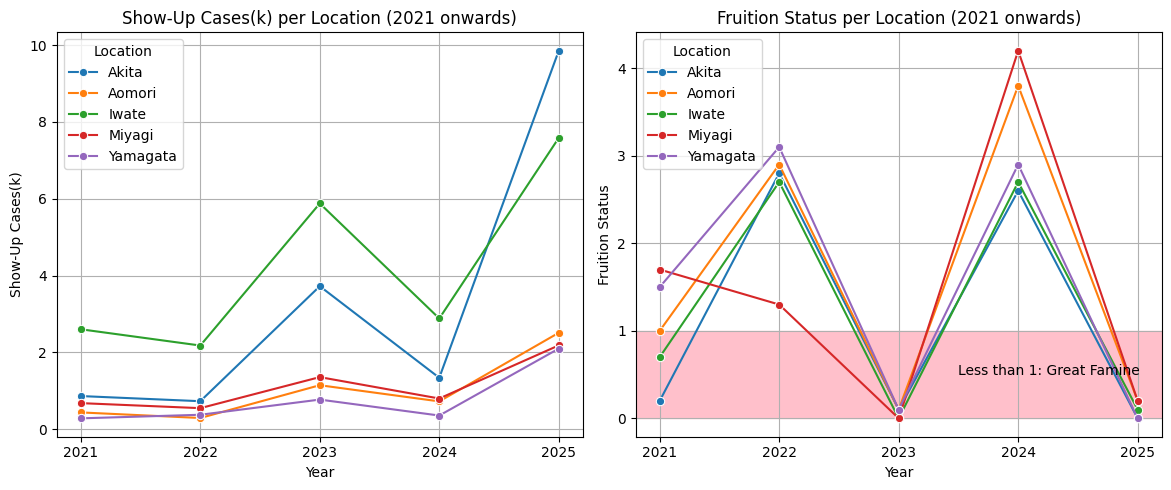

In [14]:
#plot the chart of the trend of bear show-up case and fruition status

from matplotlib import axes
from matplotlib.lines import fillStyles
import seaborn as sns
import matplotlib.pyplot as plt

areas = ['Aomori', 'Iwate', 'Miyagi', 'Akita', 'Yamagata']

#create a figure with 1x2 grid of subplots
fig, axes=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
# Plotting show_up_case

sns.lineplot(data=combine_df_north_20, x='year', y='show_case_k', ax=axes[0], hue='location',marker='o')
axes[0].set_title('Show-Up Cases(k) per Location (2021 onwards)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Show-Up Cases(k)')
axes[0].set_xticks(combine_df_north_20['year'].unique())
axes[0].grid(True)
axes[0].legend(title='Location')

# Plotting fruit data

sns.lineplot(data=combine_df_north_20, x='year', y='fruit', hue='location', marker='o')
axes[1].set_title('Fruition Status per Location (2021 onwards)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Fruition Status')
axes[1].grid(True)
axes[1].set_xticks(combine_df_north_20['year'].unique())
axes[1].legend(title='Location',loc='upper left')
axes[1].text(2023.5, 0.5, "Less than 1: Great Famine")
axes[1].axhspan(ymin=0,ymax=1,color='pink')

plt.tight_layout()
plt.show()

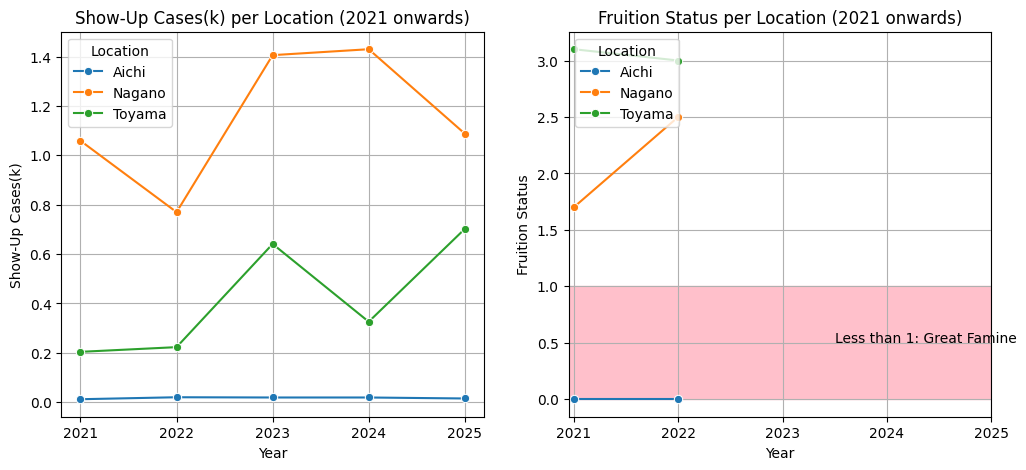

In [20]:
#plot the chart of the trend of bear show-up case and fruition status

from matplotlib import axes
from matplotlib.lines import fillStyles
import seaborn as sns
import matplotlib.pyplot as plt

chubu_areas = ['Toyama','Nagano','Gifu','Aichi']

#create a figure with 1x2 grid of subplots
fig, axes=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
# Plotting show_up_case

sns.lineplot(data=combine_df_chubu_20, x='year', y='show_case_k', ax=axes[0], hue='location',marker='o')
axes[0].set_title('Show-Up Cases(k) per Location (2021 onwards)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Show-Up Cases(k)')
axes[0].set_xticks(combine_df_chubu_20['year'].unique())
axes[0].grid(True)
axes[0].legend(title='Location')

# Plotting fruit data

sns.lineplot(data=combine_df_chubu_20, x='year', y='fruiting_index', hue='location', marker='o')
axes[1].set_title('Fruition Status per Location (2021 onwards)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Fruition Status')
axes[1].grid(True)
axes[1].set_xticks(combine_df_chubu_20['year'].unique())
axes[1].legend(title='Location',loc='upper left')
axes[1].text(2023.5, 0.5,"Less than 1: Great Famine")
axes[1].axhspan(ymin=0,ymax=1,color='pink')

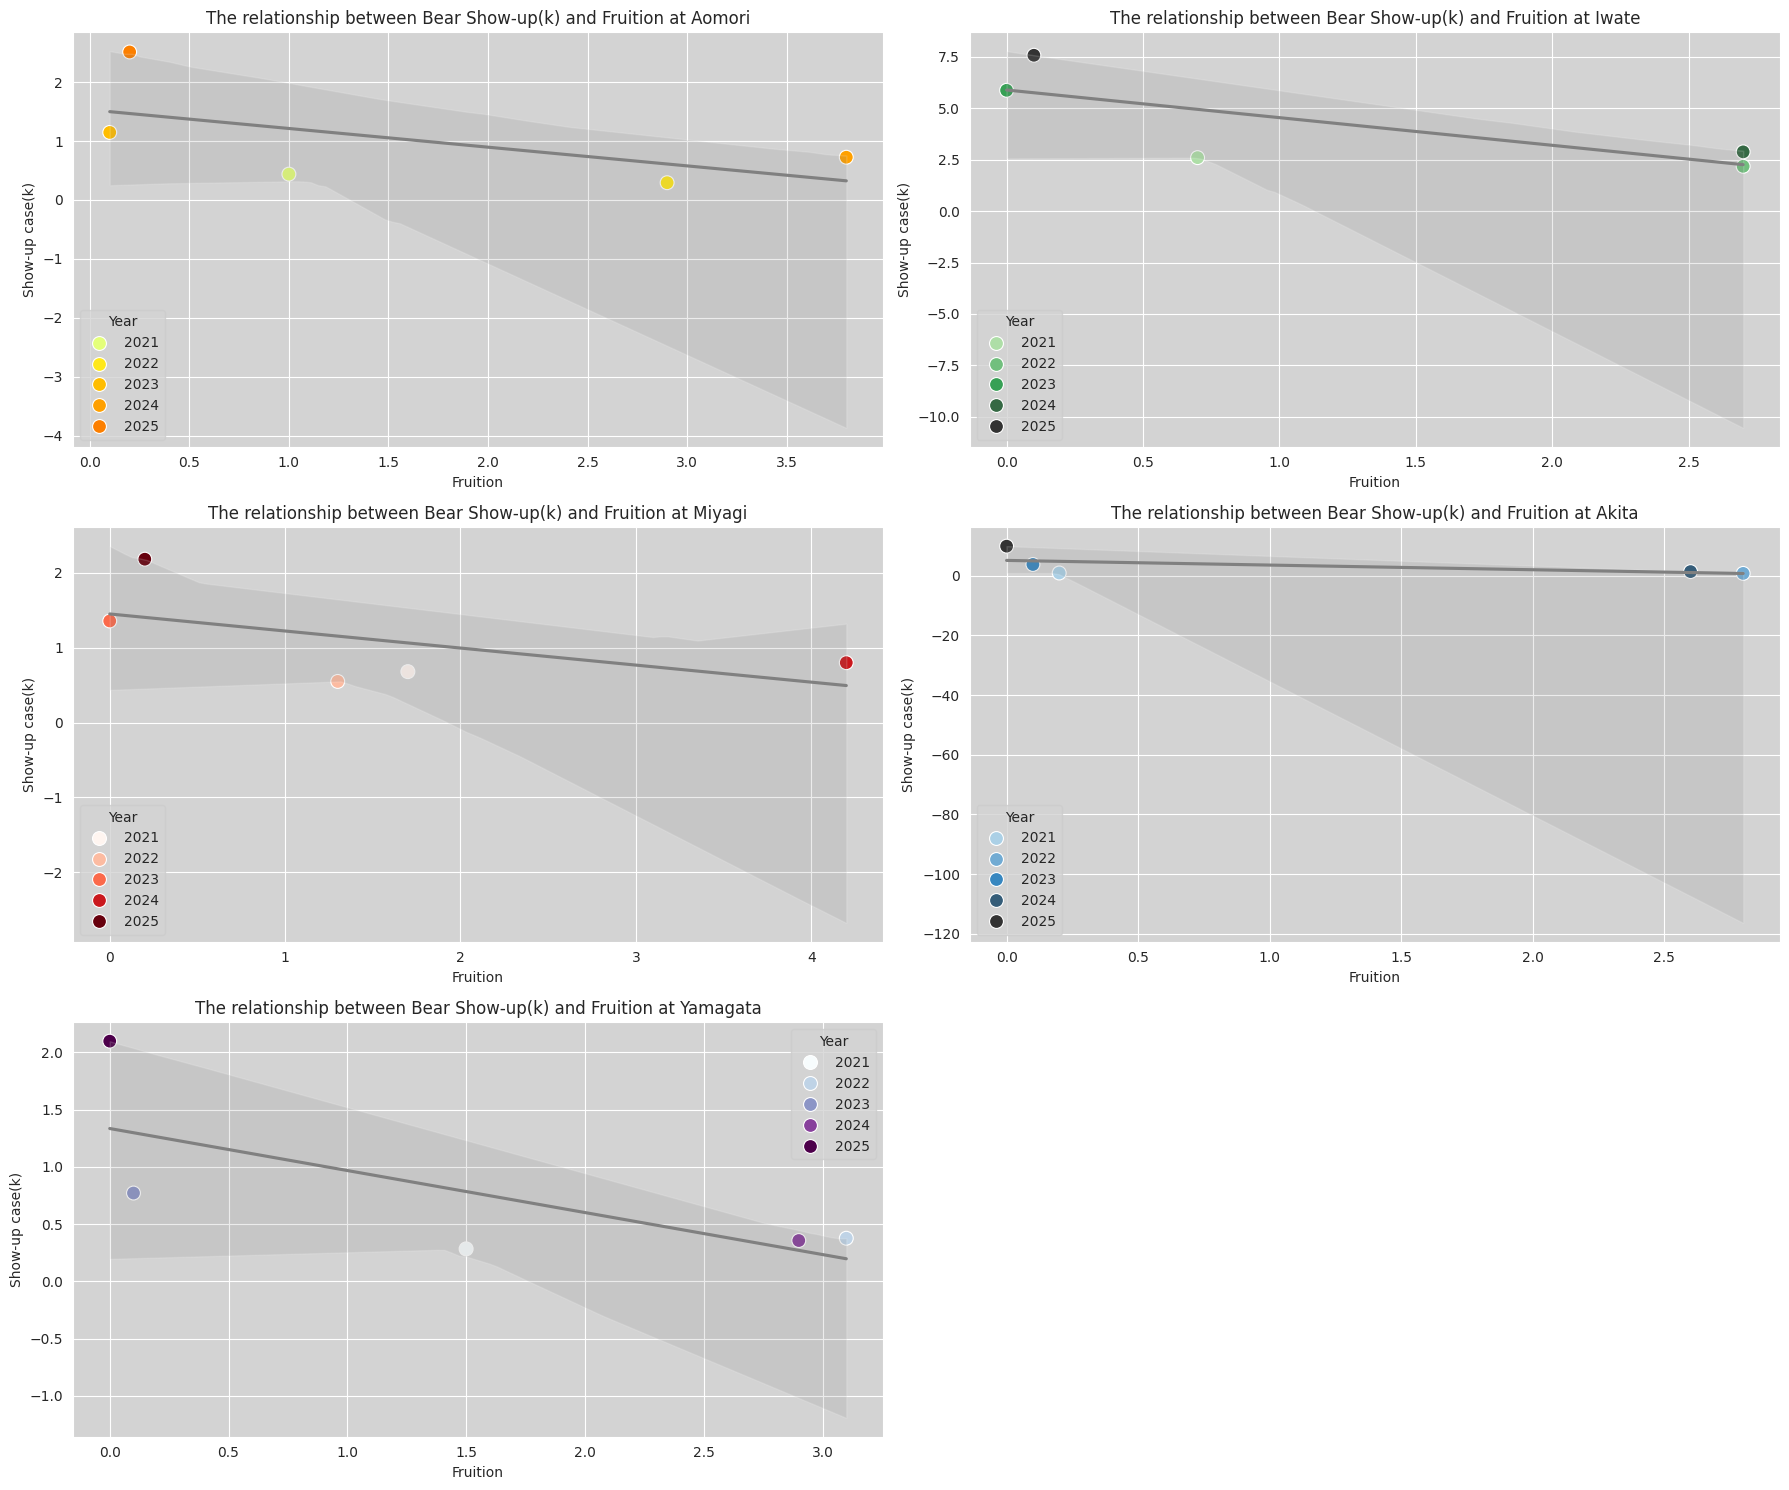

In [21]:
#plot the correlations between bear show up case and fruitions by groups(cities)

from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt



# Define a dictionary mapping locations to desired palettes
location_palettes = {
    'Aomori': 'Wistia',
    'Iwate': 'Greens_d',
    'Miyagi': 'Reds',
    'Akita': 'Blues_d',
    'Yamagata': 'BuPu'
}

sns.set_style("darkgrid", rc={'axes.facecolor': 'lightgray'})

# Create a figure with a 3x2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, area in enumerate(areas):
  ax = axes[i] # Get the current subplot axis
  location_data=combine_df_north_20[combine_df_north_20['location']==area]

  # Get the palette for the current area, default to 'viridis' if not found
  current_palette = location_palettes.get(area, 'viridis')

  sns.scatterplot(data=location_data, x='fruit', y='show_case_k', hue='year', s=100, palette=current_palette, ax=ax)
  sns.regplot(data=location_data, x='fruit', y='show_case_k', scatter=False, color='gray', ax=ax)
  ax.set_title(f'The relationship between Bear Show-up(k) and Fruition at {area}')
  ax.set_xlabel('Fruition')
  ax.set_ylabel('Show-up case(k)')
  ax.legend(title='Year')


# Hide any unused subplots if the number of areas is odd
if len(areas) < len(axes):
    for j in range(len(areas), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()